<a href="https://colab.research.google.com/github/UetaKento/Aizu_NLP/blob/main/IRNLP2019_Ex05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5. Word Sense II (Ch.5.1-4)

For International Students: goto http://www.nltk.org/book/ch05.html
Almost corresponded about:

- Lesson 1: 5.1
- Lesson 2: 5.2 
- Lesson 3: 5.3
- Lesson 4: 5.4

(★ Assignment Remark): Please read carefully about 5.2.8, 5.3.2, 5.4.1 and 5.4.2

Today's Topic:

 - Analysis of part of speech and POS tagging
 - How to use Dictionary in NLTK
 - How to get POS tag automatically by NLTK Tagger/ Regular expression tagging and lookup tagging

本日のトピック:

 - 品詞分解とタグ: 品詞の種類, タグ付けの仕方
 - PythonにおけるDictionaryの使い方
 - NLTK Taggerの利用方法: 正規表現タグ, ルックアップタグ
 
n-gram tagはDocument Modelと深いかかわりがあるので、次回行います。

# 5. Categorizing and Tagging Words
## 5.1. Using a Tagger

品詞 (Part of Speech)を付ける: 品詞タグ付け（POS-Tagger)

POS-Tagger: 文中の単語に対して品詞タグをつける。

In [ ]:
#from __future__ import division  # Python 2 users only
import nltk, re, pprint
nltk.download('all')

text1 = nltk.word_tokenize("And now for something completely different")
print(nltk.pos_tag(text1))
text2 = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
print(nltk.pos_tag(text2))

2例目において、REFUSEとPERMITの両方が現在時制動詞（VBP）と名詞（NN）として表示されることに注意してください。例えば、REFUSEは一方で「拒否」という意味の動詞であるREFUSEは、同時に「ゴミ」を意味する名詞としての機能も持ちます。したがって、POSタグを正しく理解するには、どちらの意味が使用されているかを知る必要があります。

In [ ]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
print('Similar/woman: ')
text.similar('woman')
print('Similar/bought: ')
text.similar('bought')
print('Similar/over: ')
text.similar('over')
print('Similar/the: ')
text.similar('the')

Similar/woman: 
man time day year car moment world house family child country boy
state job place way war girl work word
Similar/bought: 
made said done put had seen found given left heard was been brought
set got that took in told felt
Similar/over: 
in on to of and for with from at by that into as up out down through
is all about
Similar/the: 
a his this their its her an that our any all one these my in your no
some other and


text.similar() メソッドは単語 wを与えると, wと同じコンテキストを持つ他の単語 w_1 w_2 ... 等の全てを検索します。

## 5.2. タグ付きコーパス
### 5.2.1. タグ付きトークンの表現
str2tuple(): タグ付きトークンの標準文字列表現から、Tupleを作成。

In [ ]:
tagged_token = nltk.tag.str2tuple('fly/NN')
print(tagged_token)
print(tagged_token[0])
print(tagged_token[1])

('fly', 'NN')
fly
NN


インラインでのタグ表現に対して、個々の単語/タグ文字列に分解して、それらをstr2tuple()を用いることでTupleに変換。

In [ ]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''
print([nltk.tag.str2tuple(t) for t in sent.split()])

[('The', 'AT'), ('grand', 'JJ'), ('jury', 'NN'), ('commented', 'VBD'), ('on', 'IN'), ('a', 'AT'), ('number', 'NN'), ('of', 'IN'), ('other', 'AP'), ('topics', 'NNS'), (',', ','), ('AMONG', 'IN'), ('them', 'PPO'), ('the', 'AT'), ('Atlanta', 'NP'), ('and', 'CC'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('purchasing', 'VBG'), ('departments', 'NNS'), ('which', 'WDT'), ('it', 'PPS'), ('said', 'VBD'), ('``', '``'), ('ARE', 'BER'), ('well', 'QL'), ('operated', 'VBN'), ('and', 'CC'), ('follow', 'VB'), ('generally', 'RB'), ('accepted', 'VBN'), ('practices', 'NNS'), ('which', 'WDT'), ('inure', 'VB'), ('to', 'IN'), ('the', 'AT'), ('best', 'JJT'), ('interest', 'NN'), ('of', 'IN'), ('both', 'ABX'), ('governments', 'NNS'), ("''", "''"), ('.', '.')]


### 5.2.2. タグ付きコーパスの読み方
Brown Corpus: 既に品詞タグがつけられている
 - Brown CorpusのTextを開くと下記のようにインライン型でタグが併記されている。

    The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd / no/at evidence/nn ''/'' that/cs any/dti irregularities/nns took/vbd place/nn ./.
    
品詞タグは大文字(Brown Corpusの記法が標準型となったため、このようになっている。）

In [ ]:
print(nltk.corpus.brown.tagged_words())
print(nltk.corpus.brown.tagged_words(tagset='universal'))

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]
[('The', 'DET'), ('Fulton', 'NOUN'), ...]


In [ ]:
print(nltk.corpus.nps_chat.tagged_words())
print(nltk.corpus.conll2000.tagged_words())
print(nltk.corpus.treebank.tagged_words())

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]
[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]
[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]


タグセットが異なる場合がある (この場合は, target=''でタグセットを指定する）

In [ ]:
print(nltk.corpus.brown.tagged_words(tagset='universal'))
print(nltk.corpus.treebank.tagged_words(tagset='universal'))

[('The', 'DET'), ('Fulton', 'NOUN'), ...]
[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]


他の言語のタグ付きコーパスの読み込み例
 - このページではマルチバイトも表現できるが、Pythonのインターフェースによっては文字化けが起きる場合もある。（コーパスがダウンロードされていない場合は動きません）

In [ ]:
print(nltk.corpus.sinica_treebank.tagged_words()) #中文
print(nltk.corpus.indian.tagged_words()) # インド
print(nltk.corpus.mac_morpho.tagged_words()) # ポルトガル語
print(nltk.corpus.conll2002.tagged_words()) # CONLL2002による自動判別コーパス
print(nltk.corpus.cess_cat.tagged_words()) # カタラン語

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]
[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]
[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]
[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]
[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]


### 5.2.3. ユニバーサル品詞タグセット
ユニバーサル品詞タグセットのの表
![image.png](attachment:image.png)

In [ ]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
print(tag_fd.most_common())

[('NOUN', 30654), ('VERB', 14399), ('ADP', 12355), ('.', 11928), ('DET', 11389), ('ADJ', 6706), ('ADV', 3349), ('CONJ', 2717), ('PRON', 2535), ('PRT', 2264), ('NUM', 2166), ('X', 92)]


### 5.2.4. Nouns
名詞は人、場所、物、概念を指す。名詞はDETとADJの後に現れ、VBの主語または目的語になる事が出来る。

幾つかの名詞を含む構文パターン
![image.png](attachment:image.png)

In [ ]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
print([tag for (tag, _) in fdist.most_common()])

['NOUN', 'DET', 'ADJ', 'ADP', '.', 'VERB', 'CONJ', 'NUM', 'ADV', 'PRT', 'PRON', 'X']


### 5.2.4. Verbs
動詞は事象や行動を記述する。文脈において、動詞は典型的には一つまたは複数の名詞句の指示対象を含む関係を表す。

いくつかの動詞を含む構文パターン
![image.png](attachment:image.png)

In [ ]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
print(word_tag_fd.most_common())
print([wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB'][:100]) # 動詞最頻順100件まで出力

[((',', '.'), 4885), (('the', 'DET'), 4038), (('.', '.'), 3828), (('of', 'ADP'), 2319), (('to', 'PRT'), 2161), (('a', 'DET'), 1874), (('in', 'ADP'), 1554), (('and', 'CONJ'), 1505), (('*-1', 'X'), 1123), (('0', 'X'), 1099), (('*', 'X'), 965), (('for', 'ADP'), 815), (('*T*-1', 'X'), 806), (("'s", 'PRT'), 761), (('*U*', 'X'), 744), (('$', '.'), 718), (('The', 'DET'), 713), (('``', '.'), 702), (("''", '.'), 684), (('is', 'VERB'), 671), (('said', 'VERB'), 628), (('that', 'ADP'), 513), (('on', 'ADP'), 483), (('it', 'PRON'), 476), (('%', 'NOUN'), 445), (('by', 'ADP'), 427), (('at', 'ADP'), 402), (('with', 'ADP'), 387), (('from', 'ADP'), 386), (('million', 'NUM'), 383), (('Mr.', 'NOUN'), 375), (('*-2', 'X'), 372), (('was', 'VERB'), 367), (('are', 'VERB'), 367), (('be', 'VERB'), 356), (('*T*-2', 'X'), 345), (('has', 'VERB'), 339), (('as', 'ADP'), 333), (('its', 'PRON'), 332), (("n't", 'ADV'), 325), (('have', 'VERB'), 323), (('an', 'DET'), 316), (('that', 'DET'), 291), (('or', 'CONJ'), 291), (('

単語とタグはペアになっているため、単語を条件として、タグをイベントとして処理し、条件とイベントのペアのリストを使用して条件付き頻度分布を初期化できます。これにより、単語が指定されたタグの頻度順リストが表示されます。

In [ ]:
cfd1 = nltk.ConditionalFreqDist(wsj)
print(cfd1['yield'].most_common())
print(cfd1['cut'].most_common())

[('VERB', 28), ('NOUN', 20)]
[('VERB', 25), ('NOUN', 3)]


タグが条件として、単語がイベントとするように、ペアの順序を逆にすることができます。これで、指定されたタグに当てはまる単語を確認できます。

In [ ]:
wsj = nltk.corpus.treebank.tagged_words()
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
print(list(cfd2['VBN'])[:100])

['named', 'used', 'caused', 'exposed', 'reported', 'replaced', 'sold', 'died', 'expected', 'diagnosed', 'studied', 'industrialized', 'owned', 'found', 'classified', 'rejected', 'outlawed', 'imported', 'tracked', 'thought', 'considered', 'elected', 'based', 'lifted', 'ensnarled', 'voted', 'been', 'held', 'banned', 'renovated', 'prolonged', 'recorded', 'accumulated', 'offered', 'become', 'guaranteed', 'proposed', 'related', 'improved', 'worried', 'cluttered', 'expedited', 'retired', 'ordered', 'collected', 'required', 'received', 'moved', 'determined', 'made', 'changed', 'completed', 'disputed', 'refunded', 'estimated', 'compared', 'located', 'filed', 'scrapped', 'anticipated', 'priced', 'set', 'applied', 'existed', 'incurred', 'reached', 'Regarded', 'paid', 'trained', 'instituted', 'vowed', 'deemed', 'combined', 'removed', 'concerned', 'complained', 'accelerated', 'believed', 'called', 'solved', 'forgiven', 'launched', 'built', 'preferred', 'raised', 'scheduled', 'brought', 'increased',

VBD（過去時制）とVBN （過去分詞）の違いを明確にするために、VBDと VBNの両方になり得る単語を見つけて、周囲のテキストを見てみましょう。

In [ ]:
print([w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]])
idx1 = wsj.index(('kicked', 'VBD'))
print('kicked-VBD; ', wsj[idx1-4:idx1+1])
idx2 = wsj.index(('kicked', 'VBN'))
print('kicked-VBS; ', wsj[idx2-4:idx2+1])

['named', 'used', 'caused', 'reported', 'said', 'stopped', 'heard', 'studied', 'led', 'replaced', 'sold', 'worked', 'died', 'found', 'rejected', 'imposed', 'made', 'dumped', 'imported', 'mixed', 'described', 'continued', 'ended', 'thought', 'reached', 'had', 'approved', 'completed', 'suspended', 'lifted', 'dropped', 'voted', 'settled', 'decided', 'followed', 'welcomed', 'held', 'banned', 'pointed', 'squeezed', 'fed', 'registered', 'released', 'increased', 'forecast', 'recorded', 'announced', 'offered', 'lowered', 'spent', 'proposed', 'got', 'added', 'noted', 'turned', 'closed', 'retired', 'ordered', 'required', 'received', 'moved', 'determined', 'changed', 'upheld', 'set', 'estimated', 'compared', 'opened', 'tied', 'filed', 'disclosed', 'anticipated', 'attached', 'called', 'applied', 'favored', 'posted', 'paid', 'removed', 'accelerated', 'placed', 'vowed', 'deemed', 'prompted', 'complained', 'believed', 'met', 'solved', 'launched', 'built', 'triggered', 'developed', 'entered', 'acquire

この場合、kickの過去分詞の前に、助動詞haveの形式があります。これは一般的に本当だろうか？

### 5.2.6. Adjectives and Adverbs
形容詞は名詞を説明し、または述語となる機能を持ちます。英語の形容詞は、内部構造を持ちます。副詞は動詞で記述されているイベントの時間、方法、場所や方向を指定するために動詞を変更する機能を持ちます。

### 5.2.7. Unsimplified Tags
各名詞の品詞タイプの中で最も頻繁に使用される名詞を見つけましょう。以下のプログラムは、NNで始まるすべてのタグを検出し、各タグにいくつかのサンプル単語を提供します。NNには多くのバリアントがあることがわかります。最も重要なものには 、所有名詞の場合は$、複数名詞の場合はS（複数名詞は通常sで終わるため）、および固有名詞の場合はPが含まれます。また、タグのほとんどは、接尾辞の修飾子があります。

In [ ]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

### 5.2.8. Exploring Tagged Corpora
(★ Assignment Remark) 前の章で見たコーパスの種類の探索に簡単に戻りましょう。今回はPOSタグを活用します。  
'Learned'の単語の頻度を見て、テキストでどのように使用されているかを確認したいとします。これは、頻繁に続く言葉を抽出するようにします。


In [ ]:
brown_learned_text = brown.words(categories='learned')
print(sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often')))

[',', '.', 'accomplished', 'analytically', 'appear', 'apt', 'associated', 'assuming', 'became', 'become', 'been', 'began', 'call', 'called', 'carefully', 'chose', 'classified', 'colorful', 'composed', 'contain', 'differed', 'difficult', 'encountered', 'enough', 'equate', 'extremely', 'found', 'happens', 'have', 'ignored', 'in', 'involved', 'more', 'needed', 'nightly', 'observed', 'of', 'on', 'out', 'quite', 'represent', 'responsible', 'revamped', 'seclude', 'set', 'shortened', 'sing', 'sounded', 'stated', 'still', 'sung', 'supported', 'than', 'to', 'when', 'work']


In [ ]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


より大きなコンテキストを見て、タグと単語の特定のシーケンスを含む単語（この場合は"<Verb> to <Verb>"）を見つけましょう。

In [ ]:
from nltk.corpus import brown

list1 = [] # for counting <verb> to <verb> expression
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)
            list1.append((w1,w2,w3))
for tagged_sent in brown.tagged_sents()[:100]: # [:100]で出力結果を100件まで絞っている。全て抽出したい場合はここを消去。
    if len(tagged_sent) > 1:
        process(tagged_sent)
print(len(list1))

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
11


# Exercise Attendance

Please print all found words involving particular sequences of tags and words (in this case "<Verb> to <Verb>") such as upper code.   
    (same as the delete [:100] part)   
Also count the line number.

品詞タグの部分に関して非常に曖昧な単語を探すコード。そのような単語が各コンテキストにあるときにタグ付けされる理由を理解することは、タグ間の区別を明確にするのに役立つ。

In [ ]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                for (word, tag) in brown_news_tagged)
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


## 5.3. Mapping Words to Properties Using Python Dictionaries
Exercise 1で、既にDictionaryについては触れていますが、ここではDictionaryを使って効果的にNLTKを利用し、言語リソースにアクセスすることを学びます。

### 5.3.1. Indexing Lists and Dictionaries
テキストはPythonでは単語のリストとして扱われます。リストの重要な特性は、text1[100]などのインデックスを指定することで特定のアイテムを「ルックアップ」できることです。数値を指定し、単語を取得する方法に注目してください。
![image.png](attachment:image.png)


連想配列を用いると、このIndexをKeywordで置き換えることができ、非常に簡単に探索できます。例えば、頻度分布等を考えるとき、WordをIndexとして用い、Word Countを値として取得することが出来ます。
![image.png](attachment:image.png)

連想配列において、Indexに当たる部分をKey, 値をValueとして、Key-Valueの関係のデータベースを構築することができます。以下の表は、言語リソースに対して連想配列を用いる場合のKey-Valueの候補を示します。
![image.png](attachment:image.png)

### 5.3.2. Dictionaries in Python
以下のコードは、PythonのDictionaryの利用方法です。詳細は特に示しませんが、以下のような使い方ができます。

In [ ]:
pos = {}
print(pos)

{}


In [ ]:
pos['colorless'] = 'ADJ'
print(pos)

{'colorless': 'ADJ'}


In [ ]:
pos['ideas'] = 'N'
pos['sleep'] = 'V'
pos['furiously'] = 'ADV'
print(pos)

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}


In [ ]:
print(pos['ideas'])

N


In [ ]:
print(pos['colorless'])

ADJ


以下のように、要素のないKeyを探索しようとするとErrorになります。つまり、必ずDictionaryに含まれているKeyを把握しなければいけないので、Keyの検査が必要になります。

In [ ]:
print('green' in pos) # Keyの検査の一例: in を使うと分かるので、これをIF文で用いる
if('green' in pos):
    print(pos['green']) # これをしようとするとErrorになる（確認してみてください）

False


Dictionaryからlistに変更可能 (そのまま扱うとKeyのリストが出てくる。Valueのリストを取り出したい場合は指定する必要がある）
itemをtupleにするにはitems()を使う。

In [ ]:
print(list( pos))
print(list(pos.keys()))
print(list(pos.values()))
print(list(pos.items()))

['colorless', 'ideas', 'sleep', 'furiously']
['colorless', 'ideas', 'sleep', 'furiously']
['ADJ', 'N', 'V', 'ADV']
[('colorless', 'ADJ'), ('ideas', 'N'), ('sleep', 'V'), ('furiously', 'ADV')]


(★ Assignment Remark) sorted()メソッドを使うと昇順にソート可能。（降順もある）

In [ ]:
print(sorted(pos))
print(sorted(pos,reverse=True))

['colorless', 'furiously', 'ideas', 'sleep']
['sleep', 'ideas', 'furiously', 'colorless']


Inline形式でendswidth()メソッドを出す

In [ ]:
print([w for w in pos if w.endswith('s')])

['colorless', 'ideas']


以下の2つは同じ出力になる。tupleを用いると分かりやすい。

In [ ]:
for word in sorted(pos):
    print(word + ":", pos[word])
print("")
for key, val in sorted(pos.items()):
    print(key + ":", val)

colorless: ADJ
furiously: ADV
ideas: N
sleep: V

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


### 5.3.3. Defining Dictionaries
Dctionaryを定義するやり方はいくつか存在する。そのままDictionaryを記述する方法と、dictメソッドを呼び出す方法がある。

In [ ]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
print(pos)
pos = dict(colorless='ADJ', ideas='N', sleep='V', furiously='ADV')
print(pos)

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}


リストはKeyになれない。しかし、TupleはKeyになれる

    >>> pos = {['ideas', 'blogs', 'adventures']: 'N'}

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    <ipython-input-56-2280db643563> in <module>
    ----> 1 print(pos = {['ideas', 'blogs', 'adventures']: 'N'})
    
    TypeError: unhashable type: 'list'

In [ ]:
pos = {('ideas', 'blogs', 'adventures'): 'N'}
print(pos)

{('ideas', 'blogs', 'adventures'): 'N'}


### 5.3.4. Default Dictionaries
辞書にないキーにアクセスしようとすると、エラーが発生します。ただし、辞書がこの新しいキーのエントリを自動的に作成し、ゼロや空のリストなどのデフォルト値を与えることができる場合に役立ちます。このため、defaultdictと呼ばれる特別な種類の辞書が利用可能です。これを使用するには、デフォルト値を作成するために使用できるパラメーター、たとえばint、float、str、list、dict、 tupleを指定する必要があります。

In [ ]:
from collections import defaultdict
frequency = defaultdict(int)
frequency['colorless'] = 4
print(frequency['ideas'])

0


In [ ]:
pos = defaultdict(list)
pos['sleep'] = ['NOUN', 'VERB']
print(pos['ideas'])

[]


In [ ]:
pos = defaultdict(lambda: 'NOUN')
pos['colorless'] = 'ADJ'
print(pos['blog'])

NOUN


In [ ]:
print(list(pos.items()))

[('colorless', 'ADJ'), ('blog', 'NOUN')]


In [ ]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = defaultdict(lambda: 'UNK')
for v in v1000:
    mapping[v] = v

alice2 = [mapping[v] for v in alice]
print(alice2[:100])

['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'UNK', 'UNK', 'UNK', 'UNK', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'UNK', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'UNK', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without', 'pictures', 'or', 'conversation', "?'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',']


In [ ]:
print(len(set(alice2)))

1001


### 5.3.5. Incrementally Updating a Dictionary
辞書を使用して出現回数をカウントし、fig-tallyに示す単語を集計する方法をエミュレートできます。空のdefaultdictを初期化することから始め、テキスト内の各品詞タグを処理します。タグが以前に見られなかった場合、デフォルトでカウントはゼロになります。タグに遭遇するたびに、+= 演算子を使用してそのカウントをインクリメントします。

In [ ]:
from collections import defaultdict
counts = defaultdict(int)
from nltk.corpus import brown
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
    counts[tag] += 1
print(counts['NOUN'])

30654


In [ ]:
print(sorted(counts))

['.', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRON', 'PRT', 'VERB', 'X']


In [ ]:
from operator import itemgetter
print(sorted(counts.items(), key=itemgetter(1), reverse=True))

[('NOUN', 30654), ('VERB', 14399), ('ADP', 12355), ('.', 11928), ('DET', 11389), ('ADJ', 6706), ('ADV', 3349), ('CONJ', 2717), ('PRON', 2535), ('PRT', 2264), ('NUM', 2166), ('X', 92)]


In [ ]:
print([t for t, c in sorted(counts.items(), key=itemgetter(1), reverse=True)])

['NOUN', 'VERB', 'ADP', '.', 'DET', 'ADJ', 'ADV', 'CONJ', 'PRON', 'PRT', 'NUM', 'X']


In [ ]:
pair = ('NP', 8336)
print(pair[1])

8336


In [ ]:
print(itemgetter(1)(pair))

8336


最後の2文字に従って単語にインデックスを付けます。

In [ ]:
last_letters = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = word[-2:]
    last_letters[key].append(word)
print(last_letters['ly'][:100])
print(last_letters['zy'])

['abactinally', 'abandonedly', 'abasedly', 'abashedly', 'abashlessly', 'abbreviately', 'abdominally', 'abhorrently', 'abidingly', 'abiogenetically', 'abiologically', 'abjectly', 'ableptically', 'ably', 'abnormally', 'abominably', 'aborally', 'aboriginally', 'abortively', 'aboundingly', 'abridgedly', 'abruptedly', 'abruptly', 'abscondedly', 'absently', 'absentmindedly', 'absolutely', 'absolutistically', 'absorbedly', 'absorbingly', 'absorptively', 'abstemiously', 'abstinently', 'abstractedly', 'abstractively', 'abstractly', 'abstrusely', 'absurdly', 'abundantly', 'abusedly', 'abusefully', 'abusively', 'abysmally', 'academically', 'acceleratedly', 'accentually', 'acceptably', 'acceptedly', 'accessarily', 'accessibly', 'accessively', 'accessorily', 'accidentally', 'accidently', 'accommodately', 'accommodatingly', 'accordantly', 'accordingly', 'accountably', 'accumulatively', 'accurately', 'accursedly', 'accusably', 'accusatively', 'accusatorially', 'accusingly', 'accustomedly', 'acervatel

同じパターンを使用してアナグラム辞書を作成します。

In [ ]:
anagrams = defaultdict(list)
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)
print(anagrams['aeilnrt'])

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']


このような単語の蓄積は非常に一般的なタスクであるため、NLTKはnltk.Index（）の形式でdefaultdict（list）を作成するより便利な方法を提供します。

In [ ]:
anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)
print(anagrams['aeilnrt'])

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']


### 5.3.6. Complex Keys and Values
複雑なキーと値を持つデフォルトの辞書を使用できます。単語自体、および前の単語のタグが与えられた場合、その単語の可能なタグの範囲を調べてみましょう。POSタガーがこの情報をどのように使用できるかを確認します。

In [ ]:
pos = defaultdict(lambda: defaultdict(int))
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
    pos[(t1, w2)][t2] += 1
print(pos[('DET', 'right')] )

defaultdict(<class 'int'>, {'NOUN': 5, 'ADJ': 11})


この例では、int() のdefaultdict()を使用しています。タグ付きコーパスのバイグラムをどのように反復し、各反復ごとに単語とタグのペアのペアを処理することに注意してください。ループを通過するたびに、（t1、w2）、タグ、およびそれに続く wordのpos辞書のエントリを更新しました。posで項目を検索するとき、複合キーを指定する必要があり、辞書オブジェクトを取得します。POSタガーは、そのような情報を使用して、決定子が先行する場合、単語rightをADJとしてタグ付けすることを決定できます。

### 5.3.7. Inverting a Dictionary
Dictionaryの逆引きを行う例を示す。通常、Keyを指定してValueを高速に取得できるようにするのがDictionaryだが、逆引き（Valueを指定してKeyを取得）は遅い。

In [ ]:
counts = defaultdict(int)
for word in nltk.corpus.gutenberg.words('milton-paradise.txt'):
    counts[word] += 1
print([key for (key, value) in counts.items() if value == 32])

['mortal', 'Against', 'Him', 'There', 'brought', 'King', 'virtue', 'every', 'been', 'thine']


以下はKeyとValueを逆転したDictionaryを形成し、逆引きを行う。

In [ ]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos2 = dict((value, key) for (key, value) in pos.items())
print(pos2['N'])

ideas


Defaultdictを用いた例

In [ ]:
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})
pos2 = defaultdict(list)
for key, value in pos.items():
    pos2[value].append(key)
print(pos2['ADV'])

['furiously', 'peacefully']


Python's Dictionary Methods: A summary of commonly-used methods and idioms involving dictionaries.![image.png](attachment:image.png)

## 5.4. Automatic Tagging
さて、今回の本題のAutomatid Taggingについて見ていきます。品詞タグをテキストに自動的に追加するために、幾つかの典型的なタガーを見ていくことにします。なお、単語のタグは、単語と文内のコンテキストに依存することがわかります。このため、単語ではなくタグ付き文のレベルでデータを処理します。まず、使用するデータをロードします。

In [ ]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

### 5.4.1. The Default Tagger
最も単純なタガーは、各トークンに同じタグを割り当てます。これはかなり平凡なステップのように思えるかもしれませんが、タガーのパフォーマンスの重要なベースラインを確立します。最良の結果を得るために、各単語に最も可能性の高いタグを付けます。どのタグが最も可能性が高いかを調べてみましょう（単純化されていないタグセットを使用しています）。

In [ ]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
print(nltk.FreqDist(tags).max())

NN


これを用いると、全ての単語にNNとしてタグをつけるタガーを製作できます。

In [ ]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
print(default_tagger.tag(tokens))

[('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('green', 'NN'), ('eggs', 'NN'), ('and', 'NN'), ('ham', 'NN'), (',', 'NN'), ('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('them', 'NN'), ('Sam', 'NN'), ('I', 'NN'), ('am', 'NN'), ('!', 'NN')]


(★ Assignment Remark) 当然ながら、この方法のパフォーマンスは酷く劣ります。評価を行うと、トークンの約1/8だけが正しくタグ付けされます（つまり、名詞（NN）を保持する単語トークンは1/8ある、と言うことです。）

In [ ]:
print(default_tagger.evaluate(brown_tagged_sents))

0.13089484257215028


### 5.4.2. The Regular Expression Tagger
続いて、正規表現を用いたタガーを作成してみましょう。正規表現タガーは、一致するパターンに基づいてタグをトークンに割り当てます。たとえば、edで終わる単語は動詞の過去分詞であり、sで終わる単語は所有名詞であると 推測できます。これらを正規表現のリストとして表現できます。

In [ ]:
patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN')                     # nouns (default)
 ]

(★ Assignment Remark) これらは順番に処理され、最初に一致したものが適用されることに注意してください。これで、タガーを設定し、それを使用して文にタグを付けることができます。

In [ ]:
regexp_tagger = nltk.RegexpTagger(patterns)
print(regexp_tagger.tag(brown_sents[3]))
print(regexp_tagger.evaluate(brown_tagged_sents))

[('``', 'NN'), ('Only', 'NN'), ('a', 'NN'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", 'NN'), (',', 'NN'), ('the', 'NN'), ('jury', 'NN'), ('said', 'NN'), (',', 'NN'), ('``', 'NN'), ('considering', 'VBG'), ('the', 'NN'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'NN'), ('the', 'NN'), ('election', 'NN'), (',', 'NN'), ('the', 'NN'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'NN'), ('size', 'NN'), ('of', 'NN'), ('this', 'NNS'), ('city', 'NN'), ("''", 'NN'), ('.', 'NN')]
0.20326391789486245


最終的な正規表現« 。* »は、すべてを名詞としてタグ付けするキャッチオールです。これは、デフォルトのタガーと同等です（効率が大幅に低下します）。これを正規表現タガーの一部として再指定する代わりに、このタガーをデフォルトのタガーと組み合わせる方法はありますか？これを行う方法については、後ほど説明します。

### 5.4.3. The Lookup Tagger
多くの高頻度単語にはNNタグがありません。最も頻繁に使用される100個の単語を見つけて、最も可能性の高いタグを保存しましょう。次に、この情報を「ルックアップタガー」（NLTK UnigramTagger）のモデルとして使用できます。

In [ ]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
print(baseline_tagger.evaluate(brown_tagged_sents))

NameError: ignored

100個の最も頻繁に使用される単語のタグを知るだけで、トークンの大部分（実際にはほぼ半分）を正しくタグ付けできるようになったことは驚くことではありません(ある意味一番ナイーブな機械学習と言えます)。タグのない入力テキストで何が行われるのか見てみましょう：

In [ ]:
sent = brown.sents(categories='news')[3]
print(baseline_tagger.tag(sent))

[('``', '``'), ('Only', None), ('a', 'AT'), ('relative', None), ('handful', None), ('of', 'IN'), ('such', None), ('reports', None), ('was', 'BEDZ'), ('received', None), ("''", "''"), (',', ','), ('the', 'AT'), ('jury', None), ('said', 'VBD'), (',', ','), ('``', '``'), ('considering', None), ('the', 'AT'), ('widespread', None), ('interest', None), ('in', 'IN'), ('the', 'AT'), ('election', None), (',', ','), ('the', 'AT'), ('number', None), ('of', 'IN'), ('voters', None), ('and', 'CC'), ('the', 'AT'), ('size', None), ('of', 'IN'), ('this', 'DT'), ('city', None), ("''", "''"), ('.', '.')]


多くの単語には、最も頻繁に使用される100個の単語に含まれていないため、Noneというタグが割り当てられています。これらの場合、デフォルトのタグNNを割り当てたいと思います。つまり、最初にルックアップテーブルを使用し、タグを割り当てることができない場合は、デフォルトのタガーを使用します。これは、backoff（5）と呼ばれるプロセスです。これを行うには、以下に示すように、一方のタガーを他方のパラメーターとして指定します。これで、ルックアップタガーは名詞以外の単語の単語とタグのペアのみを保存し、単語にタグを割り当てることができない場合は常にデフォルトのタガーを呼び出します。

In [ ]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,backoff=nltk.DefaultTagger('NN'))
print(baseline_tagger.tag(sent))

[('``', '``'), ('Only', 'NN'), ('a', 'AT'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'IN'), ('such', 'NN'), ('reports', 'NN'), ('was', 'BEDZ'), ('received', 'NN'), ("''", "''"), (',', ','), ('the', 'AT'), ('jury', 'NN'), ('said', 'VBD'), (',', ','), ('``', '``'), ('considering', 'NN'), ('the', 'AT'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('the', 'AT'), ('number', 'NN'), ('of', 'IN'), ('voters', 'NN'), ('and', 'CC'), ('the', 'AT'), ('size', 'NN'), ('of', 'IN'), ('this', 'DT'), ('city', 'NN'), ("''", "''"), ('.', '.')]


これらすべてをまとめて、以下のようなサイズの範囲を持つルックアップタガーを作成および評価するプログラムを作成しましょう。

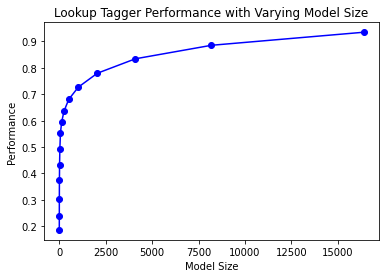

In [ ]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

display()

### 5.4.4. Evaluation

上記の例では、精度スコアに重点が置かれている。特に、以下のパイプラインの図のように考えてみると、1つのモジュールの術力エラーはDown Stream Moduleで大幅に増加します。
![image.png](attachment:image.png)

 - 人間の専門家が割り当てるタグと比較して、Taggerのパフォーマンスを評価する
 - 我々CSの人間はLanguage Studyの専門家ではなく、そうした人的資源にアクセスしにくい。
 - 代わりに Gold Standardとされている一般化されたテストデータで対応する。これは、手動で注釈が付けられ、自動システムの推測が評価される基準として受け入れられているコーパス。特定の単語に対して推測するタグがゴールドスタンダードタグと同じである場合、タガーは正しいと見なされる。

もちろん、オリジナルのゴールドスタンダードアノテーションを設計および実行した人間は人間だけでした。さらに分析すると、ゴールドスタンダードの誤りが示される場合があり、最終的にはタグセットの改訂やガイドラインの詳細化につながる可能性があります。それにもかかわらず、Automated Taggerの評価に関する限り、ゴールドスタンダードは定義上「正しい」ものです。